In [1]:
import numpy as np
import pandas as pd
idx = pd.IndexSlice
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, Image, HTML

%pylab inline
pylab.rcParams['figure.figsize'] = (18, 5)

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('../data/USDTZUSD-depth.csv', header=None)
s_to_ns = 1e9
df.rename(columns={0: 'time'}, inplace=True)
df['time'] = (df['time']*s_to_ns).astype('datetime64[ns]')
df.set_index(['time'], inplace=True)

n_cols = len(df.columns)
assert n_cols % 4 == 0
multicols = np.full([3, n_cols], '', dtype=object)
for i, col in enumerate(df.columns):
    multicols[0][i] = 'price' if i < n_cols//2 else 'volume'
    multicols[1][i] = 'buy' if i%(n_cols//2) < n_cols//4 else 'sell'
    multicols[2][i] = -((n_cols//4)-1 - i%(n_cols//4)) if i%(n_cols//2) < n_cols//4 else i % (n_cols//4)
df.columns = list(multicols)
df.sort_index(axis=1, inplace=True)

print('rows #:', len(df))
with pd.option_context('display.max_columns', 500):
    display(df.tail(5))
    display(df.describe())

rows #: 7154


price                                                  \
                      buy                                                   
                      -99     -98   -97   -96     -95     -94   -93   -92   
time                                                                        
2018-12-13 17:39:21  0.21  0.2222  0.25  0.26  0.3001  0.3333  0.34  0.46   
2018-12-13 17:40:26  0.21  0.2222  0.25  0.26  0.3001  0.3333  0.34  0.46   
2018-12-13 17:41:28  0.21  0.2222  0.25  0.26  0.3001  0.3333  0.34  0.46   
2018-12-13 17:42:29  0.21  0.2222  0.25  0.26  0.3001  0.3333  0.34  0.46   
2018-12-13 17:43:27  0.21  0.2222  0.25  0.26  0.3001  0.3333  0.34  0.46   

                                                                              \
                                                                               
                      -91    -90   -89  -88   -87     -86    -85   -84   -83   
time                                                                           
2018-12-13 17:39:21  0.51  0.522  0.66  0.7  0.81  0.8107  0.825  0.83  0.85   
2018-12-13 17:40:26  0.51  0.522  0.66  0.7  0.81  0.8107  0.825  0.83  0.85   
2018-12-13 17:41:28  0.51  0.522  0.66  0.7  0.81  0.8107  0.825  0.83  0.85   
2018-12-13 17:42:29  0.51  0.522  0.66  0.7  0.81  0.8107  0.825  0.83  0.85   
2018-12-13 17:43:27  0.51  0.522  0.66  0.7  0.81  0.8107  0.825  0.83  0.85   

                                                                        \
                                                                         
                        -82    -81     -80   -79     -78   -77     -76   
time                                                                     
2018-12-13 17:39:21  0.8507  0.851  0.8556  0.86  0.8606  0.87  0.8777   
2018-12-13 17:40:26  0.8507  0.851  0.8556  0.86  0.8606  0.87  0.8777   
2018-12-13 17:41:28  0.8507  0.851  0.8556  0.86  0.8606  0.87  0.8777   
2018-12-13 17:42:29  0.8507  0.851  0.8556  0.86  0.8606  0.87  0.8777   
2018-12-13 17:43:27  0.8507  0.851  0.8556  0.86  0.8606  0.87  0.8777   

                                                                             \
                                                                              
                        -75   -74   -73     -72     -71  -70    -69     -68   
time                                                                          
2018-12-13 17:39:21  0.8788  0.88  0.89  0.8901  0.8986  0.9  0.901  0.9032   
2018-12-13 17:40:26  0.8788  0.88  0.89  0.8901  0.8986  0.9  0.901  0.9032   
2018-12-13 17:41:28  0.8788  0.88  0.89  0.8901  0.8986  0.9  0.901  0.9032   
2018-12-13 17:42:29  0.8788  0.88  0.89  0.8901  0.8986  0.9  0.901  0.9032   
2018-12-13 17:43:27  0.8788  0.88  0.89  0.8901  0.8986  0.9  0.901  0.9032   

                                                                             \
                                                                              
                       -67   -66     -65    -64     -63   -62    -61    -60   
time                                                                          
2018-12-13 17:39:21  0.908  0.91  0.9107  0.911  0.9179  0.92  0.921  0.925   
2018-12-13 17:40:26  0.908  0.91  0.9107  0.911  0.9179  0.92  0.921  0.925   
2018-12-13 17:41:28  0.908  0.91  0.9107  0.911  0.9179  0.92  0.921  0.925   
2018-12-13 17:42:29  0.908  0.91  0.9107  0.911  0.9179  0.92  0.921  0.925   
2018-12-13 17:43:27  0.908  0.91  0.9107  0.911  0.9179  0.92  0.921  0.925   

                                                                             \
                                                                              
                      -59     -58     -57   -56    -55    -54    -53    -52   
time                                                                          
2018-12-13 17:39:21  0.93  0.9326  0.9368  0.94  0.941  0.942  0.945  0.947   
2018-12-13 17:40:26  0.93  0.9326  0.9368  0.94  0.941  0.942  0.945  0.947   
2018-12-13 17:41:28  0.93  0.9326  0.936

price                                                      \
               buy                                                       
               -99          -98          -97          -96          -95   
count  7154.000000  7154.000000  7154.000000  7154.000000  7154.000000   
mean      0.214382     0.244266     0.273694     0.306497     0.338020   
std       0.174731     0.189132     0.199972     0.212751     0.222625   
min       0.012800     0.020000     0.021200     0.025600     0.027600   
25%       0.062600     0.080000     0.100000     0.200000     0.200100   
50%       0.200000     0.200100     0.210000     0.222200     0.250000   
75%       0.260000     0.300100     0.333300     0.340000     0.460000   
max       0.810000     0.810700     0.825000     0.830000     0.850000   

                                                                        \
                                                                         
               -94          -93          -92          -91          -90   
count  7154.000000  7154.000000  7154.000000  7154.000000  7154.000000   
mean      0.367945     0.396970     0.426633     0.459952     0.494952   
std       0.231018     0.234491     0.234800     0.232723     0.226952   
min       0.050000     0.051000     0.051200     0.060000     0.062600   
25%       0.210000     0.222200     0.250000     0.260000     0.300100   
50%       0.260000     0.300100     0.333300     0.340000     0.460000   
75%       0.480000     0.510000     0.522000     0.660000     0.700000   
max       0.850700     0.851000     0.855600     0.860000     0.860600   

                                                                        \
                                                                         
               -89          -88          -87          -86          -85   
count  7154.000000  7154.000000  7154.000000  7154.000000  7154.000000   
mean      0.531716     0.567386     0.605657     0.645224     0.682194   
std       0.219827     0.212074     0.202896     0.189990     0.177813   
min       0.080000     0.100000     0.200000     0.200100     0.210000   
25%       0.333300     0.340000     0.460000     0.510000     0.522000   
50%       0.500000     0.510000     0.522000     0.660000     0.700000   
75%       0.810000     0.810700     0.825000     0.830000     0.850000   
max       0.870000     0.876900     0.877700     0.880000     0.890000   

                                                                        \
                                                                         
               -84          -83          -82          -81          -80   
count  7154.000000  7154.000000  7154.000000  7154.000000  7154.000000   
mean      0.717759     0.751518     0.779485     0.803743     0.821730   
std       0.163309     0.144995     0.127234     0.106746     0.087771   
min       0.222200     0.250000     0.260000     0.300100     0.333300   
25%       0.660000     0.700000     0.736000     0.810000     0.810700   
50%       0.810000     0.810700     0.825000     0.830000     0.850000   
75%       0.850700     0.851000     0.855600     0.859900     0.860000   
max       0.890100     0.898600     0.900000     0.901000     0.906100   

                                                                        \
                                                                         
               -79          -78          -77          -76          -75   
count  7154.000000  7154.000000  7154.000000  7154.000000  7154.000000   
mean      0.835685     0.846794     0.855989     0.863133     0.868993   
std       0.072004     0.057668     0.044058     0.033881     0.027078   
min       0.340000     0.460000     0.510000     0.522000     0.660000   
25%       0.825000     0.830000     0.850000     0.850700     0.851000   
50%       0.850700     0.851000     0.855600     0.860000     0.860600   
75%       0.870000     0.877700     0.880000     0.883900     0.890000   
max       0.9

In [3]:
def calc_cum_vol(df):
#     df = df.loc[:, idx[:,:,:4]].iloc[:4]
    cumvol = df.loc[:, idx['volume', :, :]].rename(columns={'volume': 'cumvol'}, level=0)
    cumvol['cumvol', 'buy'] = cumvol['cumvol', 'buy'].iloc[:, ::-1].cumsum(axis=1).iloc[:, ::-1]
    cumvol['cumvol', 'sell'] = cumvol['cumvol', 'sell'].cumsum(axis=1)
    df = pd.concat([df, cumvol], axis=1)
    return df

depths = calc_cum_vol(df)

(7154, 200) (7154, 200) (7154, 200)


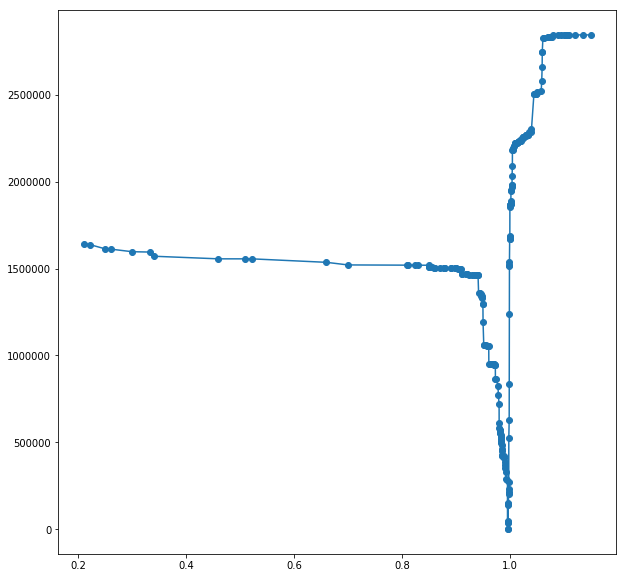

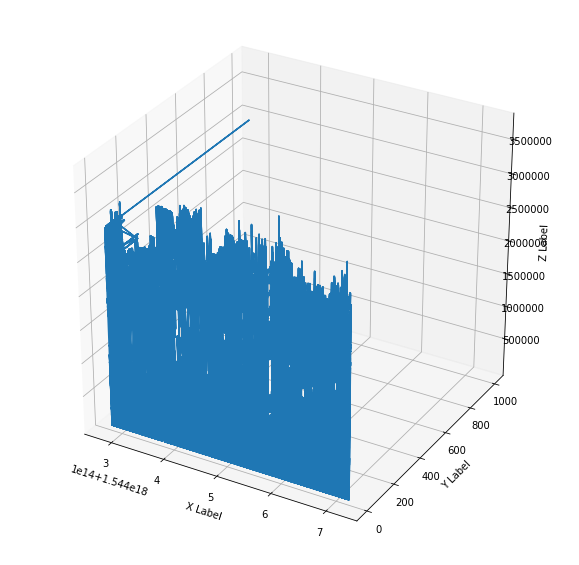

In [4]:
p = depths
p.sort_index(axis=1, inplace=True)
# p = p.loc[p.index[-20]:, idx[['price', 'cumvol'], :, -20:20]]
p = p.loc[p.index[0]:, idx[['price', 'cumvol'], :, :]]
# display(p)
Y = p['price'].values
Z = p['cumvol'].values
X = p.index.values.reshape(-1, 1).repeat(Y.shape[1], axis=1).astype(int)

print(X.shape, Y.shape, Z.shape)
fig, ax = plt.subplots(figsize=[10,10])
ax.plot(Y[-1], Z[-1], marker='o')

fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X, Y, Z)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [32]:
def get_stepped_cumvols(depths, price_min=0.9900, price_max=1.0010):
    prices = (p['price'] * 10000).round(0).astype(int)
    cumvols = p['cumvol']
    price_min, price_max, price_step = (np.array([price_min, price_max, 0.0001]) * 10000).round(0).astype(int)
    n_steps = (price_max - price_min) // price_step
    print(len(p), 'x', n_steps)

    stepped_df = pd.DataFrame(index=(p.index.astype(int) // 1e9).astype(int), columns=np.arange(price_min, price_max+1))

    for i in range(len(p)): # per row
        x_seconds = int(prices.iloc[i:i+1].index[0].value // 1e9)

        price_end = price_min-1
        for j in prices['buy']: # per col buy
            cumvol = cumvols['buy', j].values[i]
            price_start = prices['buy', j].values[i]
            price_start = min(price_start, price_max)
            price_end = max(price_end, price_min-1)
            for price in range(price_start, price_end, -1):
                stepped_df.loc[x_seconds, price] = cumvol
            price_end = price_start


        bid = prices['buy', 0].values[i]
        ask = prices['sell', 0].values[i]
        for price in range(bid+1, ask):
            stepped_df.loc[x_seconds, price] = 0

        for j in prices['sell']: # per col sell
            cumvol = cumvols['sell', j].values[i]
            price_start = prices['sell', j].values[i]
            if j == prices['sell'].columns.max():
                price_end = price_max+1
            else:
                price_end = prices['sell', j+1].values[i]
            price_start = max(price_start, price_min)
            price_end = min(price_end, price_max+1)
            #?????
            for price in range(price_start, price_end):
                stepped_df.loc[x_seconds, price] = cumvol
    return stepped_df # TODO: find out why it is not float dtype

display(p.head(3))
from time import time
t = time()
stepped_df = get_stepped_cumvols(p, 0.9800, 1.0000)
print('time:', time() - t)

with pd.option_context('display.max_columns', 500):
    display(stepped_df.head(3))
    
# print(p.loc[:, idx[['price', 'cumvol'], 'buy', :]])
# print(stepped_df.loc[:,:9895])

print()

cumvol                                              \
                           buy                                               
                           -99        -98        -97        -96        -95   
time                                                                         
2018-12-08 14:45:07  955960.91  954460.91  939460.91  937460.91  913460.91   
2018-12-08 14:46:11  974435.91  970335.91  946335.91  944835.91  929835.91   
2018-12-08 14:47:13  954615.91  953115.91  938115.91  936115.91  912115.91   

                                                                               \
                                                                                
                           -94        -93         -92         -91         -90   
time                                                                            
2018-12-08 14:45:07  898460.91  898455.91  898413.765  898313.765  898254.941   
2018-12-08 14:46:11  927835.91  903835.91  888835.910  888830.910  888788.765   
2018-12-08 14:47:13  897115.91  897110.91  897068.765  896968.765  896909.941   

                     ...   price                                          \
                     ...    sell                                           
                     ...      90      91      92      93      94      95   
time                 ...                                                   
2018-12-08 14:45:07  ...    1.21  1.2250  1.2400  1.2997  1.2999  1.3000   
2018-12-08 14:46:11  ...    1.24  1.2997  1.2999  1.3000  1.4900  1.8596   
2018-12-08 14:47:13  ...    1.21  1.2250  1.2400  1.2997  1.2999  1.3000   

                                                     
                                                     
                         96      97       98     99  
time                                                 
2018-12-08 14:45:07  1.4900  1.8596   1.9792   9.00  
2018-12-08 14:46:11  1.9792  9.0000  99.3000  99.56  
2018-12-08 14:47:13  1.4900  1.8596   1.9792   9.00  

[3 rows x 400 columns]

7154 x 200
time: 564.119710445404


,9800,9801,9802,9803,9804,9805,9806,9807,9808,9809,9810,9811,9812,9813,9814,9815,9816,9817,9818,9819,9820,9821,9822,9823,9824,9825,9826,9827,9828,9829,9830,9831,9832,9833,9834,9835,9836,9837,9838,9839,9840,9841,9842,9843,9844,9845,9846,9847,9848,9849,9850,9851,9852,9853,9854,9855,9856,9857,9858,9859,9860,9861,9862,9863,9864,9865,9866,9867,9868,9869,9870,9871,9872,9873,9874,9875,9876,9877,9878,9879,9880,9881,9882,9883,9884,9885,9886,9887,9888,9889,9890,9891,9892,9893,9894,9895,9896,9897,9898,9899,9900,9901,9902,9903,9904,9905,9906,9907,9908,9909,9910,9911,9912,9913,9914,9915,9916,9917,9918,9919,9920,9921,9922,9923,9924,9925,9926,9927,9928,9929,9930,9931,9932,9933,9934,9935,9936,9937,9938,9939,9940,9941,9942,9943,9944,9945,9946,9947,9948,9949,9950,9951,9952,9953,9954,9955,9956,9957,9958,9959,9960,9961,9962,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1544280307,385955,285923,266773,266773,266773,266773,254401,254401,254401,254401,254401,254401,254401,254401,254401,254401,254401,254401,254401,254401,254401,254401,254401,254351,254351,254351,254351,254351,254351,254351,254351,253859,253859,253859,253859,253859,253859,253859,253859,253859,253859,253859,253859,253859,253859,253859,253859,253859,253859,253859,253859,252596,242596,232596,232596,232596,232596,232596,232596,232596,232596,232596,232596,232596,232596,232596,232596,232596,232596,232596,232596,232596,232596,232596,232596,232596,232596,232596,232596,232596,232596,232596,232596,232596,232596,232596,232596,232596,232596,232596,232596,232596,232596,232596,232596,232596,232596,232596,232596,232596,232596,137583,136583,136583,136583,136568,136568,136568,136568,136568,136568,136568,136568,136568,136568,136568,136002,136002,136002,136002,136002,136002,136002,136002,136002,136002,136002,136002,122776,122776,122776,122776,122776,122776,122776,122776,122776,122776,122776,122776,102776,102776,102776,102776,102776,102776,102776,102776,102776,102776,102776,102756,72756,57756,57756,57756,57756,57756,57756,57756,57756,57756,57756,57756,57756,39641.3,39641.3,24641.3,22608.8,22608.8,22608.8,22608.8,22608.8,22608.8,22608.8,22608.8,22608.8,22608.8,22608.8,22608.8,22608.8,9625,4635,4635,0,5,10,176328,196328,602548,1.08245e+06,1.08296e+06,1.08296e+06,1.08296e+06,1.08296e+06,1.21293e+06,1.21294e+06,1.21294e+06,1.21295e+06,1.22331e+06,1.6476e+06
1544280371,376330,276298,257148,257148,257148,257148,244776,244776,244776,244776,244776,244776,244776,244776,244776,244776,244776,244776,244776,244776,244776,244776,244776,244726,244726,244726,244726,244726,244726,244726,244726,244234,244234,244234,244234,244234,244234,244234,244234,244234,244234,244234,244234,244234,244234,244234,244234,244234,244234,244234,244234,242971,232971,222971,222971,222971,222971,222971,222971,222971,222971,222971,222971,222971,222971,222971,222971,222971,222971,222971,222971,222971,222971,222971,222971,222971,222971,222971,222971,222971,222971,222971,222971,222971,222971,222971,222971,222971,222971,222971,222971,222971,222971,222971,222971,222971,222971,222971,222971,222971,222971,127958,127958,127958,127958,127943,126943,126943,126943,126943,126943,126943,126943,126943,126943,126943,126377,126377,126377,126377,126377,126377,126377,126377,126377,126377,126377,126377,113151,113151,113151,113151,113151,113151,113151,113151,113151,113151,113151,113151,93150.7,93150.7,93150.7,93150.7,93150.7,93150.7,93150.7,93150.7,93150.7,93150.7,93150.7,93131,63131,48131,48131,48131,48131,48131,48131,48131,48131,48131,48131,48131,48131,30016.3,30016.3,15016.3,12983.8,12983.8,12983.8,12983.8,12983.8,12983.8,12983.8,12983.8,12983.8,12983.8,12983.8,12983.8,12983.8,0,0,0,0,0,0,176026,196026,602246,1.08215e

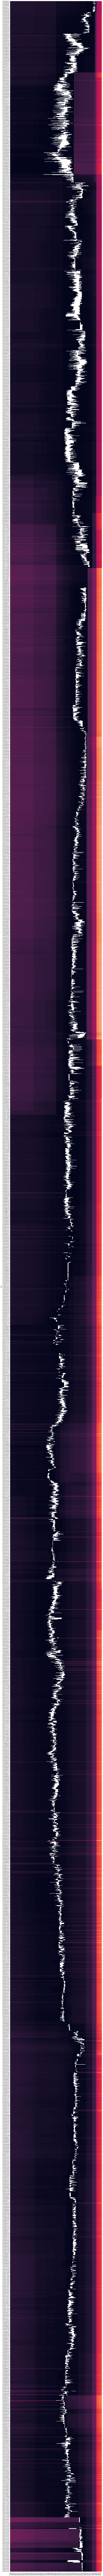

In [34]:
heatmap_data = stepped_df.iloc[:, :].copy()
fig, ax = plt.subplots(figsize=(15, 60/1000 * len(heatmap_data)))
# heatmap_data.index = pd.DatetimeIndex(pd.to_datetime(heatmap_data.index * 1e9))
sns.heatmap(heatmap_data.astype(float), ax=ax, cbar=False, mask=heatmap_data==0)
# heatmap_data

In [9]:
import numpy as np

def obj_data_from_xyz(xs, ys, zs):
    def get_v(i, j):
        x = xs[i]
        y = ys[j]
        z = zs[j, i]
        v_idx = j*w + i + 1
        return np.array([x, y, z]), v_idx
    
    def get_n(p1, p2, p3):
        return np.cross(p2-p1, p3-p1)
    
    def get_new_nfs(i, j):
        tl, tl_i = get_v(i-1, j-1)
        tr, tr_i = get_v(i, j-1)
        bl, bl_i = get_v(i-1, j)
        br, br_i = get_v(i, j)
        n1 = get_n(tl, tr, bl)
        n2 = get_n(tr, br, bl)
        f1 = [tl_i, tr_i, bl_i]
        f2 = [tr_i, br_i, bl_i]
        return np.array([n1, n2]), np.array([f1, f2]), 
    
    w = len(xs)
    l = len(ys)
    
    vs = np.empty(l * w * 3, dtype=float).reshape(l, w, 3)
    ns = np.empty((l-1) * (w-1) * 2 * 3, dtype=float).reshape(l-1, (w-1), 2, 3)
    fs = np.empty_like(ns, dtype=int)
    for j in range(l):
        for i in range(w):
            v, v_idx = get_v(i, j)
            vs[j, i] = v
    for j in range(1, l):
        for i in range(1, w):
            new_ns, new_fs = get_new_nfs(i, j)
            ns[j-1, i-1] = new_ns
            fs[j-1, i-1] = new_fs
    return vs, ns, fs


def obj_from_xyz(xs=None, ys=None, zs=None, df=None, filename=None):
    if df is not None:
        xs = df.columns.values
        ys = df.index.values
        zs = df.values
    vs, ns, fs = obj_data_from_xyz(xs, ys, zs)
    vs = vs.reshape(-1, 3).astype(str)
    ns = ns.reshape(-1, 3).astype(str)
    fs = fs.reshape(-1, 3).astype(str)
    vs_str = '\n'.join([f'v {v[0]} {v[1]} {v[2]}' for v in vs])
    ns_str = '\n'.join([f'n {n[0]} {n[1]} {n[2]}' for n in ns])
    fs_str = '\n'.join([f'f {f[0]}//{i+1} {f[1]}//{i+1} {f[2]}//{i+1}' for i, f in enumerate(fs)])

    obj = f'''# generated obj
mtllib box.mtl
o Cube
{vs_str}
{ns_str}
usemtl Material
s off
{fs_str}
    '''
    if filename is None:
        return obj
    file = open(filename, 'w+')
    file.write(obj)

xs = stepped_df.columns.values
ys = (stepped_df.index.values - stepped_df.index.values[0]) /10
zs = stepped_df.values /10000
print(xs.min(), xs.max(), ys.min(), ys.max(), zs.min(), zs.max())
obj_from_xyz(xs, ys, zs, filename='../data/depth-3d.obj')

9880 9900 0.0 6182.9 nan nan


(1000, 201) (1000, 201) (1000, 201)


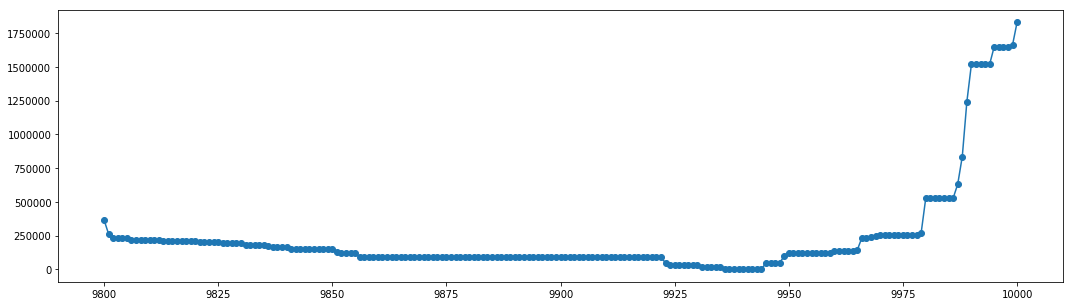

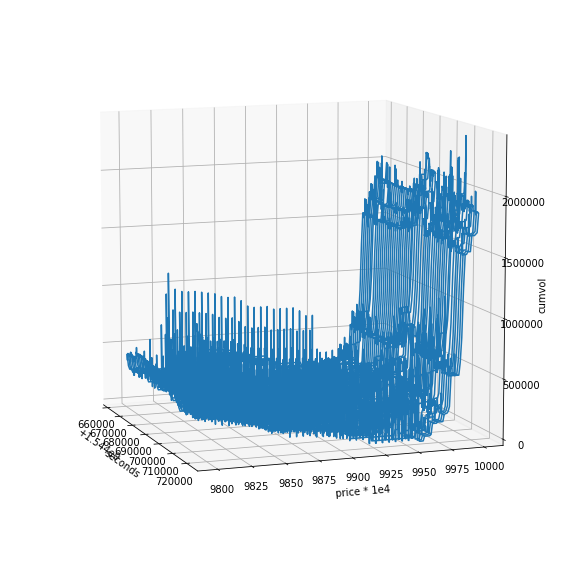

In [6]:
def draw_stepped_df(stepped_df):
    Z = stepped_df.values
    Y = stepped_df.columns.values.reshape(1, -1).repeat(Z.shape[0], axis=0)
    X = stepped_df.index.values.reshape(-1, 1).repeat(Z.shape[1], axis=1)

    print(X.shape, Y.shape, Z.shape)

    fig = plt.figure(figsize=[10,10])
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_wireframe(X, Y, Z)

    ax.set_xlabel('seconds')
    ax.set_ylabel('price * 1e4')
    ax.set_zlabel('cumvol')
    ax.view_init(10, -20)
    
plt.plot(stepped_df.columns, stepped_df.iloc[1], marker='o')

draw_stepped_df(stepped_df)

In [7]:
vs = stepped_df.loc[:, 9890:9895].reset_index().melt(id_vars='time', var_name='price', value_name='cumvol')
fs = 7
display(vs)

,time,price,cumvol
0,1544661178,9890,112987
1,1544661243,9890,92631.2
2,1544661298,9890,93145.3
3,1544661364,9890,92631.3
4,1544661426,9890,93169.3
5,1544661488,9890,92631.3
6,1544661548,9890,91173.3
7,1544661610,9890,92631.3
8,1544661668,9890,91173.3
9,1544661732,9890,92631.3


In [8]:
prices = (p['price', 'buy'] * 10000).round(0).astype(int)
cumvols = p['cumvol', 'buy']

price_min, price_max = 0.9880, 0.9900
price_min, price_max, price_step = (np.array([price_min, price_max, 0.0001]) * 10000).round(0).astype(int)
stepped_df = pd.DataFrame(index=(p.index.astype(int) // 1e9).astype(int), columns=np.arange(price_min, price_max+1))


display(p)
display(prices)
display(cumvols)
with pd.option_context('display.max_columns', 500):
    display(stepped_df)


cumvol                                         \
                             buy                                          
                             -99          -98          -97          -96   
time                                                                      
2018-12-13 00:32:58  1347547.932  1343447.932  1319447.932  1317947.932   
2018-12-13 00:34:03  1301190.211  1298498.391  1296498.391  1292398.391   
2018-12-13 00:34:58  1304954.332  1301704.332  1299012.512  1297012.512   
2018-12-13 00:36:04  1304440.332  1301190.332  1298498.512  1296498.512   
2018-12-13 00:37:06  1304978.332  1301728.332  1299036.512  1297036.512   
2018-12-13 00:38:08  1304440.332  1301190.332  1298498.512  1296498.512   
2018-12-13 00:39:08  1312982.332  1302982.332  1299732.332  1297040.512   
2018-12-13 00:40:10  1304440.332  1301190.332  1298498.512  1296498.512   
2018-12-13 00:41:08  1312982.332  1302982.332  1299732.332  1297040.512   
2018-12-13 00:42:12  1304440.332  1301190.332  1298498.512  1296498.512   
2018-12-13 00:43:16  1304978.332  1301728.332  1299036.512  1297036.512   
2018-12-13 00:44:19  1340266.530  1336166.530  1312166.530  1310666.530   
2018-12-13 00:45:19  1328096.603  1326596.603  1311596.603  1309596.603   
2018-12-13 00:46:22  1349238.610  1325238.610  1323738.610  1308738.610   
2018-12-13 00:47:23  1349776.610  1325776.610  1324276.610  1309276.610   
2018-12-13 00:48:25  1351880.610  1347780.610  1323780.610  1322280.610   
2018-12-13 00:49:29  1321013.371  1319513.371  1304513.371  1302513.371   
2018-12-13 00:50:31  1342795.224  1318795.224  1317295.224  1302295.224   
2018-12-13 00:51:28  1343333.205  1319333.205  1317833.205  1302833.205   
2018-12-13 00:52:35  1322482.205  1320982.205  1305982.205  1303982.205   
2018-12-13 00:53:36  1323112.296  1321612.296  1306612.296  1304612.296   
2018-12-13 00:54:37  1350513.714  1326513.714  1325013.714  1310013.714   
2018-12-13 00:55:37  1349854.122  1325854.122  1324354.122  1309354.122   
2018-12-13 00:56:42  1328005.122  1326505.122  1311505.122  1309505.122   
2018-12-13 00:57:01  1350960.122  1346860.122  1322860.122  1321360.122   
2018-12-13 00:58:39  1349047.122  1325047.122  1323547.122  1308547.122   
2018-12-13 00:59:41  1348160.581  1324160.581  1322660.581  1307660.581   
2018-12-13 01:00:44  1347353.581  1323353.581  1321853.581  1306853.581   
2018-12-13 01:01:49  1348160.581  1324160.581  1322660.581  1307660.581   
2018-12-13 01:02:47  1347353.581  1323353.581  1321853.581  1306853.581   
...                          ...          ...          ...          ...   
2018-12-13 17:13:40  1365204.715  1341204.715  1339704.715  1324704.715   
2018-12-13 17:14:41  1361874.000  1357774.000  1333774.000  1332274.000   
2018-12-13 17:15:43  1358326.555  1334326.555  1332826.555  1317826.555   
2018-12-13 17:16:42  1317645.696  1293645.696  1292145.696  1277145.696   
2018-12-13 17:17:48  1320957.928  1316857.928  1292857.928  1291357.928   
2018-12-13 17:18:50  1620407.564  1610407.564  1607157.564  1604465.744   
2018-12-13 17:19:49  1647619.443  1643519.443  1619519.443  1618019.443   
2018-12-13 17:20:37  1648161.443  1646161.443  1642061.443  1618061.443   
2018-12-13 17:21:49  1693450.781  1691450.781  1687350.781  1663350.781   
2018-12-13 17:22:56  1693446.781  1689346.781  1665346.781  1663846.781   
2018-12-13 17:23:57  1682637.769  1679945.949  1677945.949  1673845.949   
2018-12-13 17:24:44  1694339.264  1692339.264  1688239.264  1664239.264   
2018-12-13 17:26:02  1693797.264  1689697.264  1665697.264  1664197.264   
2018-12-13 17:27:03  1683701.873  1681701.873  1677601.873  1653601.873   
2018-12-13 17:28:04  1680654.813  1676554.813  1652554.813  1651054.813   
2018-12-13 17:29:05  1671930.029  1647930.029  1646430.029  1631430.029   
2018-12-13 17:30:05  1671661.029  1647661.029  1646161.029  1631161.029   
2018-12-13 17:31:08  1675032.029  1670932.029  1646932.029  1645432.029   
2018-12-13 17:32:10  1671661.029  1647661.029  1646

,-99,-98,-97,-96,-95,-94,-93,-92,-91,-90,...,-9,-8,-7,-6,-5,-4,-3,-2,-1,0
time,,,,,,,,,,,,,,,,,,,,,
2018-12-13 00:32:58,2100,2222,2500,2600,3001,3333,3400,4600,5100,5220,...,9864,9873,9874,9893,9913,9922,9923,9929,9930,9935
2018-12-13 00:34:03,2000,2001,2100,2222,2500,2600,3001,3333,3400,4600,...,9855,9864,9874,9922,9923,9929,9930,9935,9936,9942
2018-12-13 00:34:58,1000,2000,2001,2100,2222,2500,2600,3001,3333,3400,...,9851,9855,9864,9874,9922,9923,9929,9930,9935,9937
2018-12-13 00:36:04,1000,2000,2001,2100,2222,2500,2600,3001,3333,3400,...,9851,9855,9864,9874,9922,9923,9929,9930,9935,9938
2018-12-13 00:37:06,1000,2000,2001,2100,2222,2500,2600,3001,3333,3400,...,9851,9855,9864,9874,9922,9923,9929,9930,9935,9936
2018-12-13 00:38:08,1000,2000,2001,2100,2222,2500,2600,3001,3333,3400,...,9851,9855,9864,9874,9922,9923,9929,9930,9935,9939
2018-12-13 00:39:08,800,1000,2000,2001,2100,2222,2500,2600,3001,3333,...,9850,9851,9855,9864,9874,9922,9923,9929,9930,9935
2018-12-13 00:40:10,1000,2000,2001,2100,2222,2500,2600,3001,3333,3400,...,9851,9855,9864,9874,9922,9923,9929,9930,9935,9938
2018-12-13 00:41:08,800,1000,2000,2001,2100,2222,2500,2600,3001,3333,...,9850,9851,9855,9864,9874,9922,9923,9929,9930,9935


,-99,-98,-97,-96,-95,-94,-93,-92,-91,-90,...,-9,-8,-7,-6,-5,-4,-3,-2,-1,0
time,,,,,,,,,,,,,,,,,,,,,
2018-12-13 00:32:58,1347547.932,1343447.932,1319447.932,1317947.932,1302947.932,1300947.932,1276947.932,1261947.932,1261942.932,1261884.108,...,131755.489,129714.517,113987.432,112987.432,103270.964,90999.505,45739.364,30739.364,30173.971,15173.971
2018-12-13 00:34:03,1301190.211,1298498.391,1296498.391,1292398.391,1268398.391,1266898.391,1251898.391,1249898.391,1225898.391,1210898.391,...,118213.696,95672.162,93631.190,92631.190,47197.231,32197.231,31631.838,16631.838,1631.838,173.838
2018-12-13 00:34:58,1304954.332,1301704.332,1299012.512,1297012.512,1292912.512,1268912.512,1267412.512,1252412.512,1250412.512,1226412.512,...,128727.817,118727.817,96186.283,94145.311,93145.311,47885.170,32885.170,32319.777,16972.000,1972.000
2018-12-13 00:36:04,1304440.332,1301190.332,1298498.512,1296498.512,1292398.512,1268398.512,1266898.512,1251898.512,1249898.512,1225898.512,...,128213.817,118213.817,95672.283,93631.311,92631.311,47371.170,32371.170,31805.777,16458.000,1458.000
2018-12-13 00:37:06,1304978.332,1301728.332,1299036.512,1297036.512,1292936.512,1268936.512,1267436.512,1252436.512,1250436.512,1226436.512,...,128751.817,118751.817,96210.283,94169.311,93169.311,47909.170,32909.170,32343.777,16996.000,1996.000
2018-12-13 00:38:08,1304440.332,1301190.332,1298498.512,1296498.512,1292398.512,1268398.512,1266898.512,1251898.512,1249898.512,1225898.512,...,128213.817,118213.817,95672.283,93631.311,92631.311,47371.170,32371.170,31805.777,16458.000,1458.000
2018-12-13 00:39:08,1312982.332,1302982.332,1299732.332,1297040.512,1295040.512,1290940.512,1266940.512,1265440.512,1250440.512,1248440.512,...,151350.960,126755.817,116755.817,94214.283,92173.311,91173.311,45913.170,30913.170,30347.777,15000.000
2018-12-13 00:40:10,1304440.332,1301190.332,1298498.512,1296498.512,1292398.512,1268398.512,1266898.512,1251898.512,1249898.512,1225898.512,...,128213.817,118213.817,95672.283,93631.311,92631.311,47371.170,32371.170,31805.777,16458.000,1458.000
2018-12-13 00:41:08,1312982.332,1302982.332,1299732.332,1297040.512,1295040.512,1290940.512,1266940.512,1265440.512,1250440.512,1248440.512,...,151350.960,126755.817,116755.817,94214.283,92173.311,91173.311,45913.170,30913.170,30347.777,15000.000


,9880,9881,9882,9883,9884,9885,9886,9887,9888,9889,9890,9891,9892,9893,9894,9895,9896,9897,9898,9899,9900
time,,,,,,,,,,,,,,,,,,,,,
1544661178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1544661243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1544661298,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1544661364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1544661426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1544661488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1544661548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1544661610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1544661668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
